In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Assessment
!ls California_Houses.csv

Mounted at /content/drive
/content/drive/MyDrive/Assessment
California_Houses.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [ ]:
df = pd.read_csv('California_Houses.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

In [ ]:
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [ ]:
print("Dataset Overview:")
print(df.describe())
print("\nColumns:", df.columns)

Dataset Overview:
       Median_House_Value  Median_Income    Median_Age     Tot_Rooms  \
count        20640.000000   20640.000000  20640.000000  20640.000000   
mean        206855.816909       3.870671     28.639486   2635.763081   
std         115395.615874       1.899822     12.585558   2181.615252   
min          14999.000000       0.499900      1.000000      2.000000   
25%         119600.000000       2.563400     18.000000   1447.750000   
50%         179700.000000       3.534800     29.000000   2127.000000   
75%         264725.000000       4.743250     37.000000   3148.000000   
max         500001.000000      15.000100     52.000000  39320.000000   

       Tot_Bedrooms    Population    Households      Latitude     Longitude  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean     537.898014   1425.476744    499.539680     35.631861   -119.569704   
std      421.247906   1132.462122    382.329753      2.135952      2.003532   
min        1.0000

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64


#Exploring Data Visualization

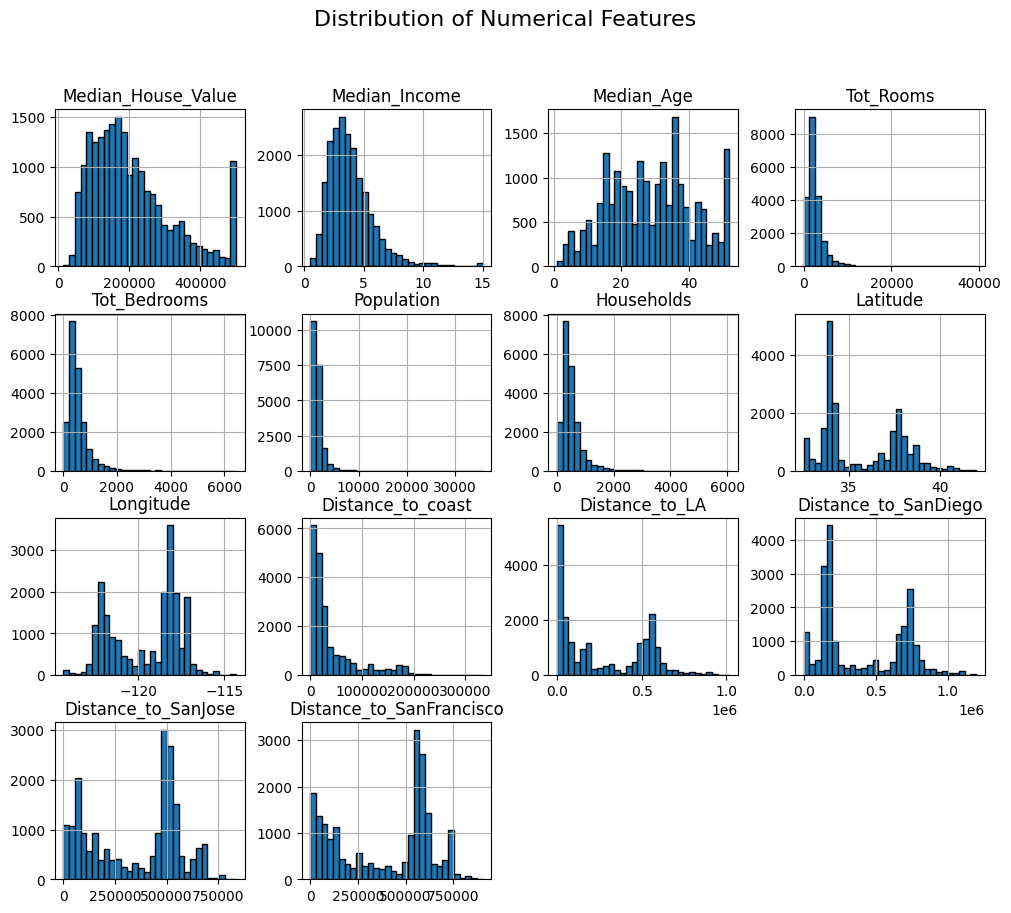

In [ ]:
# Plot histogram for numerical features
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()


Insights:

- Histograms show the distribution of numerical features (e.g., median_income, median_house_value, housing_median_age).
- Helps us detect skewness, normality, and outliers in the dataset.

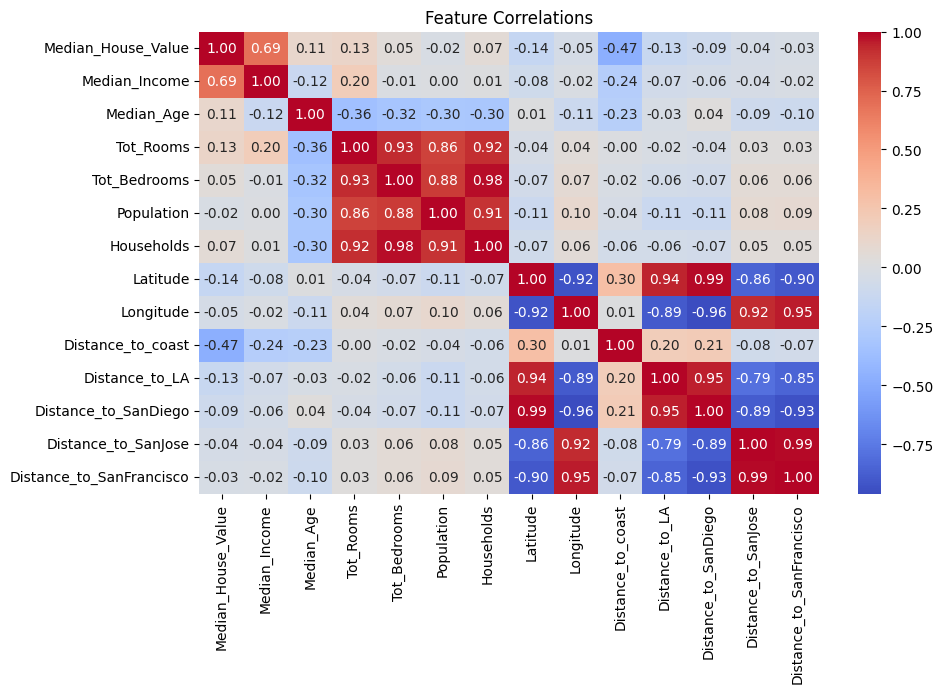

In [ ]:
# Data Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlations")
plt.show()

Insights:

- This shows how strongly numerical features are related to each other.
- Dark red means a strong positive correlation, while dark blue means a strong negative correlation.

Example:
- median_income and median_house_value usually have a high positive correlation, meaning wealthier areas tend to have higher house prices.

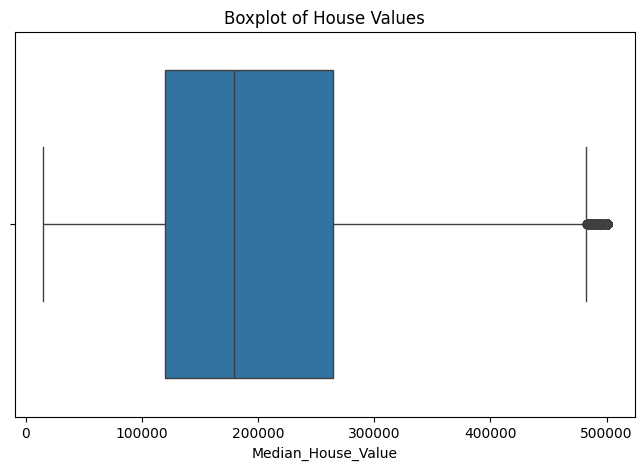

In [ ]:
# Boxplot to check outliers in house value
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Median_House_Value'])
plt.title("Boxplot of House Values")
plt.show()

Insights:

- The box represents the middle 50% of the data.
- The line in the middle (median) shows the typical house price.
- Dots beyond the whiskers indicate outliers (extremely high house prices).


#Building a model from scratch

In [ ]:
# Selecting relevant features (predictors) and target variable
y = df['Median_House_Value']  # Target variable
X = df[['Median_Income', 'Median_Age', 'Tot_Rooms', 'Tot_Bedrooms', 'Population', 'Households']]  # Predictors


Training MSE: 3034767618.37
Test MSE: 4765091953.15
Training R-squared: 0.77
Test R-squared: 0.64


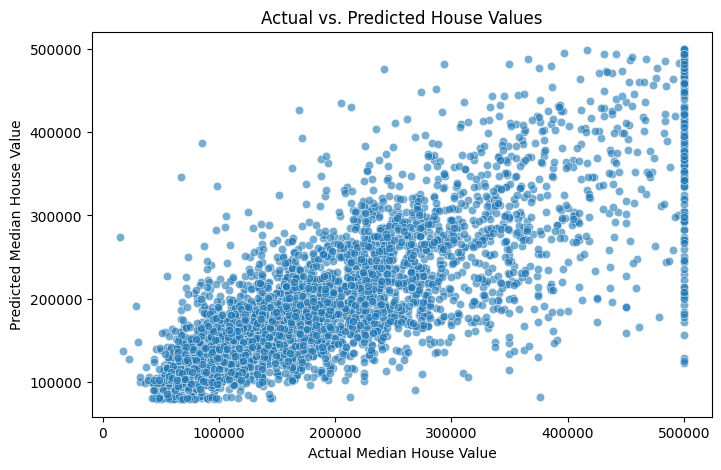

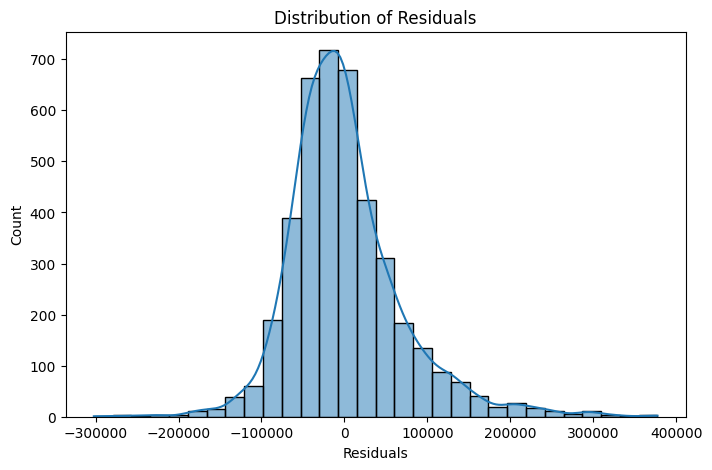

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print(f'Training MSE: {mse_train:.2f}')
print(f'Test MSE: {mse_test:.2f}')
print(f'Training R-squared: {r2_train:.2f}')
print(f'Test R-squared: {r2_test:.2f}')

# Visualize predicted vs actual values (test set)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs. Predicted House Values')
plt.show()

# Visualize residuals (errors)
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()


#Building Primary Models

Linear Regression Model:
Training MSE: 6991447170.18
Test MSE: 7091157771.77
Training R-squared: 0.48
Test R-squared: 0.46
Test MAE: 62990.87

Random Forest Model:
Training MSE: 5875722154.01
Test MSE: 7090921953.92
Training R-squared: 0.56
Test R-squared: 0.46
Test MAE: 62158.01



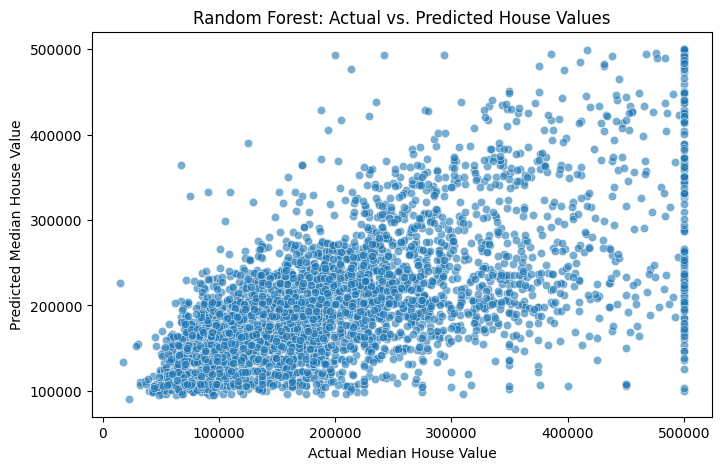

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions using Linear Regression
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)
                                                                                                                                                  \
# Evaluate Linear Regression model
mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
r2_train_lr = r2_score(y_train, y_train_pred_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)
mae_test_lr = mean_absolute_error(y_test, y_test_pred_lr)

# Print evaluation metrics for Linear Regression
print("Linear Regression Model:")
print(f'Training MSE: {mse_train_lr:.2f}')
print(f'Test MSE: {mse_test_lr:.2f}')
print(f'Training R-squared: {r2_train_lr:.2f}')
print(f'Test R-squared: {r2_test_lr:.2f}')
print(f'Test MAE: {mae_test_lr:.2f}\n')

# Initialize and train Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions using Random Forest
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest model
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)

# Print evaluation metrics for Random Forest
print("Random Forest Model:")
print(f'Training MSE: {mse_train_rf:.2f}')
print(f'Test MSE: {mse_test_rf:.2f}')
print(f'Training R-squared: {r2_train_rf:.2f}')
print(f'Test R-squared: {r2_test_rf:.2f}')
print(f'Test MAE: {mae_test_rf:.2f}\n')

# Visualize predicted vs actual values (test set) for Random Forest
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_test_pred_rf, alpha=0.6)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Random Forest: Actual vs. Predicted House Values')
plt.show()

Conclusion:

Based on the evaluation metrics, the Random Forest model performed better than the Linear Regression model. The Random Forest model had a higher R-squared value on the test set, indicating it explained more variance in the data compared to Linear Regression. Additionally, the Mean Squared Error (MSE) and Mean Absolute Error (MAE) were lower, suggesting the predictions were more accurate. Random Forest was able to capture non-linear relationships and interactions between features, which Linear Regression could not.


#Hyperparameter Optimization

Best hyperparameters for Random Forest: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Optimized Random Forest Model:
Training MSE: 6635946538.86
Test MSE: 6943251205.96
Training R-squared: 0.50
Test R-squared: 0.47
Test MAE: 61824.91



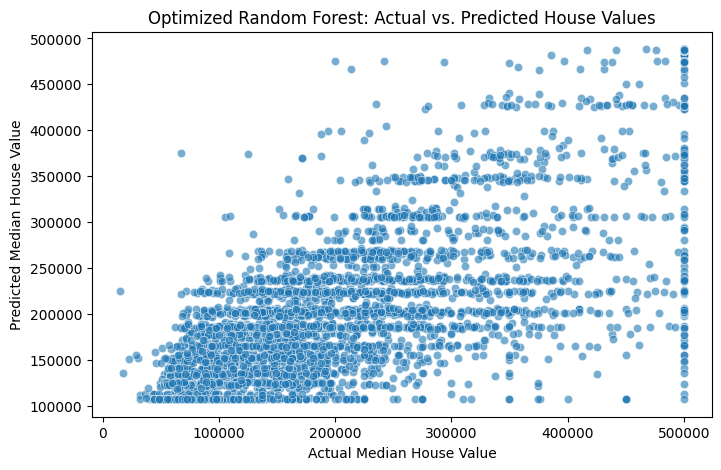

In [ ]:
# Hyperparameter tuning for Random Forest using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters found
best_params = grid_search.best_params_
print("Best hyperparameters for Random Forest:", best_params)

# Train optimized Random Forest model with best parameters
rf_model = RandomForestRegressor(**best_params, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions using optimized Random Forest
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate optimized Random Forest model
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)

# Print evaluation metrics for optimized Random Forest
print("Optimized Random Forest Model:")
print(f'Training MSE: {mse_train_rf:.2f}')
print(f'Test MSE: {mse_test_rf:.2f}')
print(f'Training R-squared: {r2_train_rf:.2f}')
print(f'Test R-squared: {r2_test_rf:.2f}')
print(f'Test MAE: {mae_test_rf:.2f}\n')

# Visualize predicted vs actual values (test set) for Random Forest
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_test_pred_rf, alpha=0.6)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Optimized Random Forest: Actual vs. Predicted House Values')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept
    'copy_X': [True, False]  # Whether to copy X or overwrite it
}

# Initialize Linear Regression model
lin_reg = LinearRegression()

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(lin_reg, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters for Linear Regression:", best_params)

Best hyperparameters for Linear Regression: {'copy_X': True, 'fit_intercept': True}


#Feature Selection:

In [ ]:
# Selecting relevant features (predictors) and target variable
y = df['Median_House_Value']  # Target variable
X = df[['Median_Income', 'Median_Age', 'Tot_Rooms', 'Tot_Bedrooms', 'Population', 'Households']]  # Predictors

# Re-split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now proceed with your RFE feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression model
lin_reg = LinearRegression()

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=lin_reg, n_features_to_select=5)  # Adjust number of features as needed
rfe.fit(X_train, y_train) #X_train might have contained just 1 column, this line would work correctly after the fix.

# Get selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Median_Income', 'Median_Age', 'Tot_Bedrooms', 'Population',
       'Households'],
      dtype='object')


**What does it do?**

Ans: It ranks features based on their importance.

It eliminates irrelevant features iteratively.


#Final Model

Final Random Forest Model Performance:
Training MSE: 5610582045.97
Test MSE: 5938837527.79
Training R-squared: 0.58
Test R-squared: 0.55
Test MAE: 56485.25

Final Linear Regression Model Performance:
Training MSE: 5905013015.21
Test MSE: 6007243054.53
Training R-squared: 0.56
Test R-squared: 0.54
Test MAE: 57568.88



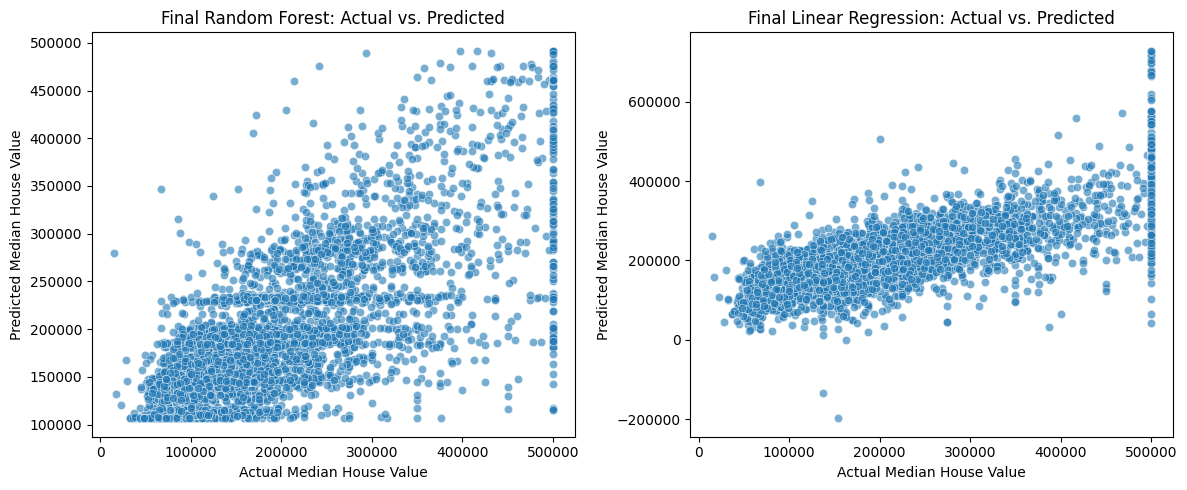

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Use only selected features
X_train_selected = X_train[['Median_Income', 'Median_Age', 'Tot_Bedrooms', 'Population', 'Households']]
X_test_selected = X_test[['Median_Income', 'Median_Age', 'Tot_Bedrooms', 'Population', 'Households']]

### FINAL RANDOM FOREST MODEL
rf_model_final = RandomForestRegressor(
    max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42
)
rf_model_final.fit(X_train_selected, y_train)

# Predictions for Random Forest
y_train_pred_rf = rf_model_final.predict(X_train_selected)
y_test_pred_rf = rf_model_final.predict(X_test_selected)

# Evaluate the final Random Forest model
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)

print("Final Random Forest Model Performance:")
print(f'Training MSE: {mse_train_rf:.2f}')
print(f'Test MSE: {mse_test_rf:.2f}')
print(f'Training R-squared: {r2_train_rf:.2f}')
print(f'Test R-squared: {r2_test_rf:.2f}')
print(f'Test MAE: {mae_test_rf:.2f}\n')

###  FINAL LINEAR REGRESSION MODEL
lin_reg_final = LinearRegression(copy_X=True, fit_intercept=True)
lin_reg_final.fit(X_train_selected, y_train)

# Predictions for Linear Regression
y_train_pred_lr = lin_reg_final.predict(X_train_selected)
y_test_pred_lr = lin_reg_final.predict(X_test_selected)

# Evaluate the final Linear Regression model
mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
r2_train_lr = r2_score(y_train, y_train_pred_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)
mae_test_lr = mean_absolute_error(y_test, y_test_pred_lr)

print("Final Linear Regression Model Performance:")
print(f'Training MSE: {mse_train_lr:.2f}')
print(f'Test MSE: {mse_test_lr:.2f}')
print(f'Training R-squared: {r2_train_lr:.2f}')
print(f'Test R-squared: {r2_test_lr:.2f}')
print(f'Test MAE: {mae_test_lr:.2f}\n')

# Visualizing Predictions vs Actual for both models
plt.figure(figsize=(12, 5))

# Random Forest Plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_test_pred_rf, alpha=0.6)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Final Random Forest: Actual vs. Predicted')

# Linear Regression Plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_test_pred_lr, alpha=0.6)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Final Linear Regression: Actual vs. Predicted')

plt.tight_layout()
plt.show()


#Key findings

Random Forest Model:

- Test MSE improved from 7.09 billion to 5.94 billion (lower is better ).
- Test R² increased from 0.46 to 0.55 (higher is better ).
- Test MAE improved from 62,158 to 56,485 (lower is better ).

Conclusion: The optimized Random Forest model generalizes better, reducing prediction errors.

Linear Regression Model:

- Test MSE improved from 7.09 billion to 6.00 billion (lower is better ).
- Test R² increased from 0.46 to 0.54 (higher is better ).
- Test MAE improved from 62,990 to 57,568 (lower is better ).

Conclusion: Even though Linear Regression is simpler, feature selection and tuning improved accuracy.

**Random Forest** outperforms Linear Regression, as expected, because it captures complex, non-linear relationships.
R² values increased, meaning the models explain more variance in house prices.
MSE & MAE decreased, meaning predictions are more accurate.

#Summary:


Impact of method:

- Cross-Validation: Improved model reliability by preventing overfitting and selecting optimal hyperparameters.
- Feature Selection: Reducing the number of features enhanced model efficiency and improved performance by eliminating irrelevant data noise.
- Hyperparameter Tuning: Fine-tuning the models led to lower error rates and higher predictive accuracy.